# NETFLIX CASE STUDY 

Netflix initially started as a DVD rental service in 1998. It mostly relied on a third party postal services to deliver its DVDs to the users. This resulted in heavy losses which they soon mitigated with the introduction of their online streaming service in 2007.

In order to make this happen, Netflix invested in a lot of algorithms to provide a flawless movie experience to its users. One of such algorithms is the recommendation system that is used by Netflix to provide suggestions to the users.

A recommendation system understands the needs of the users and provides suggestions of the various cinematographic products.

Lets import the important python libraries which we need to analyze the dataset and find out some meaningful insights.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We have imported the libraries and now its time load our dataset.

In [2]:
df = pd.read_csv("netflix.txt")

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
## Lets see our data contains any NAN values

In [7]:
df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
## As we can see that there are muyltiple trues in the multiple columns so it means our dataframe has NAN values and we need to 
## deal with it. 

In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Lets check null values as well 

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
## Lets check Unique Values 

In [13]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [14]:
#Check for duplicates 

In [15]:
df.duplicated().sum()

0

In [16]:
# As we can see that there are no duplicate values present in our dataset 

In [17]:
data = df.copy()         #Always make copy of a dataset in order to keep the dataset same

In [18]:
data.shape

(8807, 12)

In [19]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [20]:
## We do not need the description columns so we can drop it 

In [21]:
df.drop(["description"] , axis = 1 , inplace = True)

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [23]:
## Lets replace the NAN values in the director column with "data not available"

In [24]:
df["director"] = df["director"].fillna("Data not available")

In [25]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Data not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Data not available,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Data not available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,Data not available,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [26]:
## As we can see that the NAN values have converted into data not available.
#Similarly we will do for cast as well.

In [27]:
df["cast"] = df["cast"].fillna("Data not available")

In [28]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data not available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Data not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Data not available,Data not available,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Data not available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,Data not available,Data not available,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [29]:
## Lets see which country has most common and then we will replace NAN values with most common country 

In [30]:
df["country"].value_counts()

United States                                            2818
India                                                     972
United Kingdom                                            419
Japan                                                     245
South Korea                                               199
                                                         ... 
Ghana, United States                                        1
Spain, Canada, United States                                1
United States, United Kingdom, France, Germany, Japan       1
Ireland, United Kingdom, France, Germany                    1
Iceland, Sweden, Belgium                                    1
Name: country, Length: 748, dtype: int64

In [31]:
df["country"] = df["country"].fillna("United States")

In [32]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data not available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Data not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Data not available,Data not available,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Data not available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,Data not available,Data not available,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [33]:
## In the rating section the values given in the dataset are incorrect some of them are NAN and some them are given in minutes 

In [34]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [35]:
df["rating"] = df["rating"].replace({"74 min": "TV-MA" , "84 min": "TV-MA" , "66 min": "TV-MA" , "TV-Y7-FV": "TV-Y7"})
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data not available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Data not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Data not available,Data not available,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Data not available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,Data not available,Data not available,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [36]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'UR'], dtype=object)

In [37]:
# Renaming values for Rating for better understanding
# Source : https://help.netflix.com/en/node/2064
df['rating'] = df['rating'].replace({
                'PG-13': 'Teens - Age above 12',
                'TV-MA': 'Adults',
                'PG': 'Kids - with parental guidence',
                'TV-14': 'Teens - Age above 14',
                'TV-PG': 'Kids - with parental guidence',
                'TV-Y': 'Kids',
                'TV-Y7': 'Kids - Age above 7',
                'R': 'Adults',
                'TV-G': 'Kids',
                 'G': 'Kids',
                'NC-17': 'Adults',
                'NR': 'NR',
                'UR' : 'UR'
                
})

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data not available,United States,"September 25, 2021",2020,Teens - Age above 12,90 min,Documentaries
1,s2,TV Show,Blood & Water,Data not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Data not available,Data not available,United States,"September 24, 2021",2021,Adults,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Data not available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,Adults,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,Data not available,Data not available,United States,"July 1, 2019",2018,Kids - Age above 7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,Adults,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,Kids - with parental guidence,88 min,"Children & Family Movies, Comedies"


In [38]:
df["rating"].unique()

array(['Teens - Age above 12', 'Adults', 'Kids - with parental guidence',
       'Teens - Age above 14', 'Kids', 'Kids - Age above 7', 'NR', nan,
       'UR'], dtype=object)

In [39]:
df['month'] = pd.DatetimeIndex(df['date_added']).month

In [40]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data not available,United States,"September 25, 2021",2020,Teens - Age above 12,90 min,Documentaries,9.0
1,s2,TV Show,Blood & Water,Data not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9.0
3,s4,TV Show,Jailbirds New Orleans,Data not available,Data not available,United States,"September 24, 2021",2021,Adults,1 Season,"Docuseries, Reality TV",9.0
4,s5,TV Show,Kota Factory,Data not available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,Adults,158 min,"Cult Movies, Dramas, Thrillers",11.0
8803,s8804,TV Show,Zombie Dumb,Data not available,Data not available,United States,"July 1, 2019",2018,Kids - Age above 7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",7.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,Adults,88 min,"Comedies, Horror Movies",11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,Kids - with parental guidence,88 min,"Children & Family Movies, Comedies",1.0


In [41]:
df["director"].max()

'Şenol Sönmez'

In [42]:
## Lets convert DATE TIME FORMAT 

In [43]:
df["date_added"].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [44]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

In [45]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data not available,United States,2021-09-25,2020,Teens - Age above 12,90 min,Documentaries,9.0,25.0,2021.0,9.0
1,s2,TV Show,Blood & Water,Data not available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9.0,24.0,2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9.0,24.0,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,Data not available,Data not available,United States,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV",9.0,24.0,2021.0,9.0
4,s5,TV Show,Kota Factory,Data not available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9.0,24.0,2021.0,9.0


In [46]:
df["director"].sort_values(ascending = False).max()

'Şenol Sönmez'

In [47]:
## As we can see from the above data that "senol Sonmez" is the maximum in the director column. 

In [48]:
df["director"] = df["director"].replace({"Data not available": "Şenol Sönmez"})
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data not available,United States,2021-09-25,2020,Teens - Age above 12,90 min,Documentaries,9.0,25.0,2021.0,9.0
1,s2,TV Show,Blood & Water,Şenol Sönmez,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9.0,24.0,2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9.0,24.0,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,Şenol Sönmez,Data not available,United States,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV",9.0,24.0,2021.0,9.0
4,s5,TV Show,Kota Factory,Şenol Sönmez,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9.0,24.0,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,Adults,158 min,"Cult Movies, Dramas, Thrillers",11.0,20.0,2019.0,11.0
8803,s8804,TV Show,Zombie Dumb,Şenol Sönmez,Data not available,United States,2019-07-01,2018,Kids - Age above 7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",7.0,1.0,2019.0,7.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,Adults,88 min,"Comedies, Horror Movies",11.0,1.0,2019.0,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,Kids - with parental guidence,88 min,"Children & Family Movies, Comedies",1.0,11.0,2020.0,1.0


In [49]:
df= df.assign(cast = df["cast"].str.split(" ,")).explode("cast")

In [50]:
df.reset_index()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data not available,United States,2021-09-25,2020,Teens - Age above 12,90 min,Documentaries,9.0,25.0,2021.0,9.0
1,s2,TV Show,Blood & Water,Şenol Sönmez,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9.0,24.0,2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9.0,24.0,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,Şenol Sönmez,Data not available,United States,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV",9.0,24.0,2021.0,9.0
4,s5,TV Show,Kota Factory,Şenol Sönmez,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9.0,24.0,2021.0,9.0


# Its time to calculate the statistical values about each feature such as count , max , mean , min and so on 

In [51]:
df.describe()

,release_year,month,day_added,year_added,month_added
count,8807.000000,8797.000000,8797.000000,8797.000000,8797.000000
mean,2014.180198,6.654996,12.497329,2018.871888,6.654996
std,8.819312,3.436554,9.887551,1.574243,3.436554
min,1925.000000,1.000000,1.000000,2008.000000,1.000000
25%,2013.000000,4.000000,1.000000,2018.000000,4.000000
50%,2017.000000,7.000000,13.000000,2019.000000,7.000000
75%,2019.000000,10.000000,20.000000,2020.000000,10.000000
max,2021.000000,12.000000,31.000000,2021.000000,12.000000


# 

In [52]:
df.describe(include = "object")

,show_id,type,title,director,cast,country,rating,duration,listed_in
count,8807,8807,8807,8807,8807,8807,8803,8804,8807
unique,8807,2,8807,4528,7693,748,8,220,514
top,s5954,Movie,Boomika (Hindi),Şenol Sönmez,Data not available,United States,Adults,1 Season,"Dramas, International Movies"
freq,1,6131,1,2636,825,3649,4012,1793,362


In [53]:
## Comparison of TV shows vs movies

# 1. Lets calculate the count of tv shows and movies and then we will visualize it.

In [54]:
df[df["type"] == "Movie"].count()

show_id         6131
type            6131
title           6131
director        6131
cast            6131
country         6131
date_added      6131
release_year    6131
rating          6129
duration        6128
listed_in       6131
month           6131
day_added       6131
year_added      6131
month_added     6131
dtype: int64

In [55]:
df[df["type"] == "TV Show"].count()

show_id         2676
type            2676
title           2676
director        2676
cast            2676
country         2676
date_added      2666
release_year    2676
rating          2674
duration        2676
listed_in       2676
month           2666
day_added       2666
year_added      2666
month_added     2666
dtype: int64

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


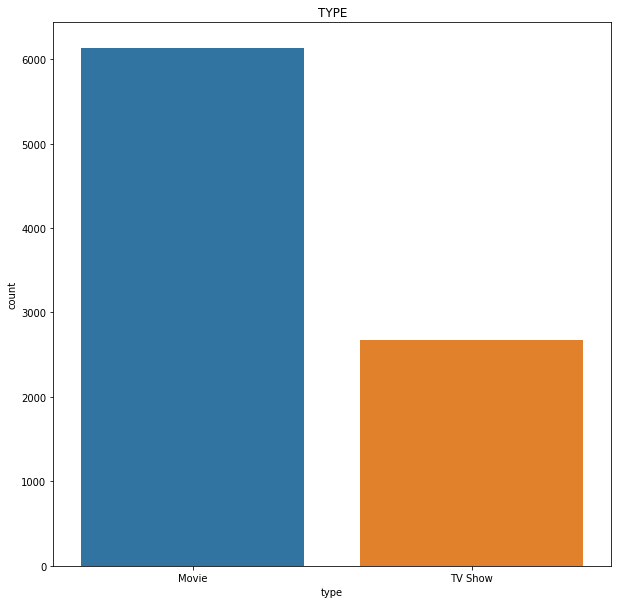

In [56]:
sns.countplot(df["type"])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title("TYPE")
plt.show()

# It is clearly shows that movies are more likable as campared to Tv show 

## From the above we can inference that the movies are more likable than TV Shows from the dataset

# 2 . Lets see the rating of Shows and Movies.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result 

Text(0.5, 1.0, 'Rating')

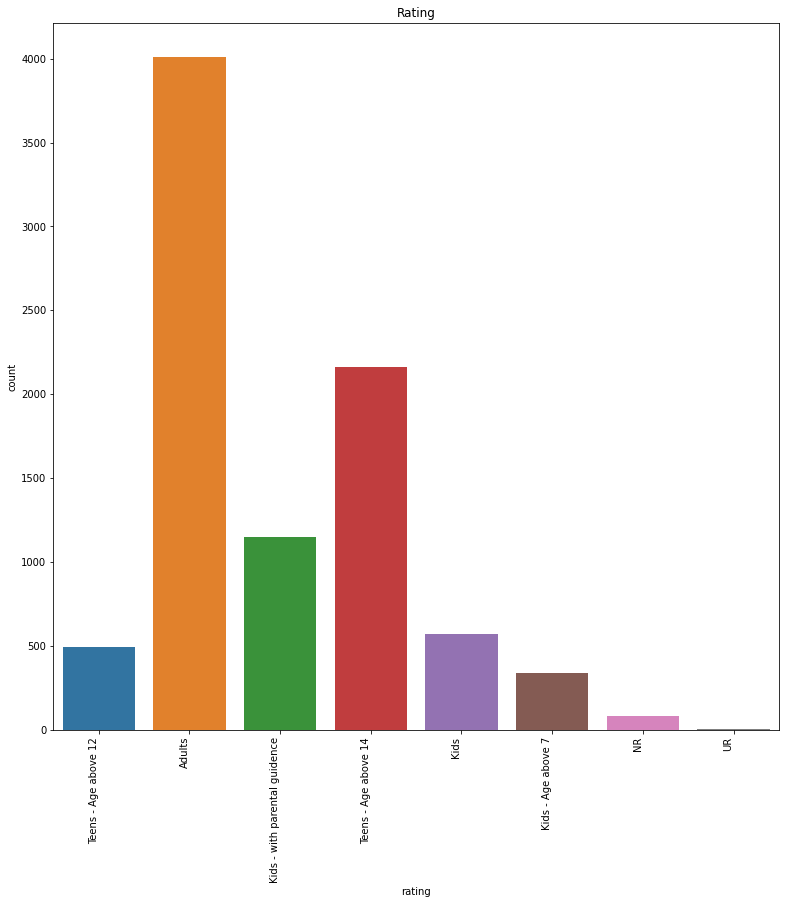

In [57]:
x = df["rating"]
sns.countplot(x)
sns.countplot(x).set_xticklabels(sns.countplot(x).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

It is seen that the highest number of rating has been given by adults. 

# 3 . In which year the highest number of the TV Shows & Movies were released 

In [58]:
x = df["date_added"].dt.year.value_counts()

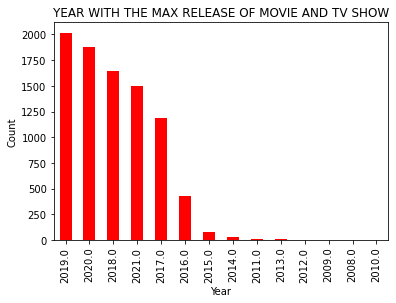

In [59]:
x.plot(kind = "bar" , color = "r")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("YEAR WITH THE MAX RELEASE OF MOVIE AND TV SHOW")
plt.show()

2019 is the year with the max release of Movies and Tv shows.

# # 4 . Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [60]:
x = df["director"].value_counts().sort_values(ascending = False).head(10)

In [61]:
x

Şenol Sönmez              2636
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Youssef Chahine             12
Jay Chapman                 12
Martin Scorsese             12
Name: director, dtype: int64

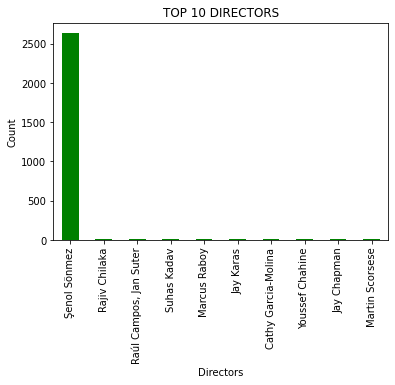

In [62]:
x.plot(kind = "bar" , color = "g")
plt.xlabel("Directors")
plt.ylabel("Count")
plt.title("TOP 10 DIRECTORS")
plt.show()

Senol Sonmez is the director who directed more number of Movies and Tv shows.

# 5 . What type of content is available in different countries?

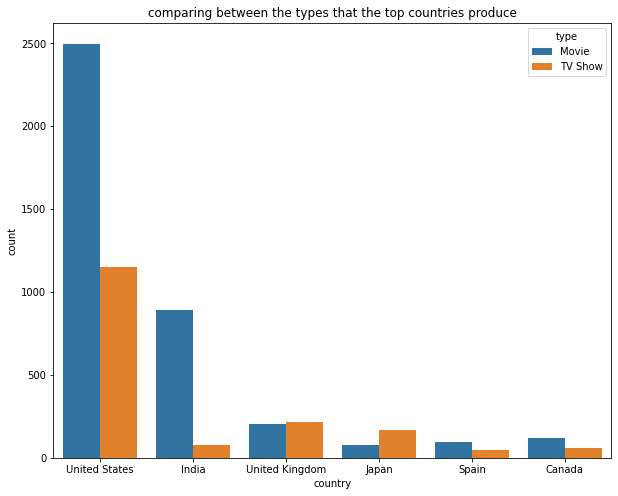

In [63]:
top_productive_countries=df[(df['country']=='United States')|(df['country']=='India')|(df['country']=='United Kingdom')|(df['country']=='Japan')|
                             (df['country']=='Canada')|(df['country']=='Spain')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('comparing between the types that the top countries produce')
plt.show()

Here it is seen that movies are more watching in most of countries as campared to Tv shows 
Interesting fact is that movies are more likable in India.xd 

In [64]:
#df["duration"].unique()

df[["minute" , "unit"]] = df["duration"].str.split(" " , expand = True)

In [65]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month,day_added,year_added,month_added,minute,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data not available,United States,2021-09-25,2020,Teens - Age above 12,90 min,Documentaries,9.0,25.0,2021.0,9.0,90,min
1,s2,TV Show,Blood & Water,Şenol Sönmez,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9.0,24.0,2021.0,9.0,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9.0,24.0,2021.0,9.0,1,Season
3,s4,TV Show,Jailbirds New Orleans,Şenol Sönmez,Data not available,United States,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV",9.0,24.0,2021.0,9.0,1,Season
4,s5,TV Show,Kota Factory,Şenol Sönmez,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9.0,24.0,2021.0,9.0,2,Seasons


##  7 . Its time to check the distribution of Movie duration

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


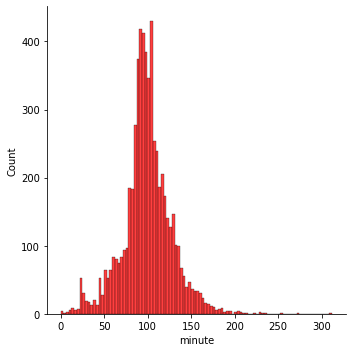

In [66]:
netflix= df[df["type"] == "Movie"]
netflix["minute"] = netflix["minute"].fillna(0.0).astype(float)
sns.displot(data = netflix , x = "minute" , bins = 100 , color = "r")
plt.show()

# 8 . Lets plot the countplot and see the content present on Netflix according to the Maturity level

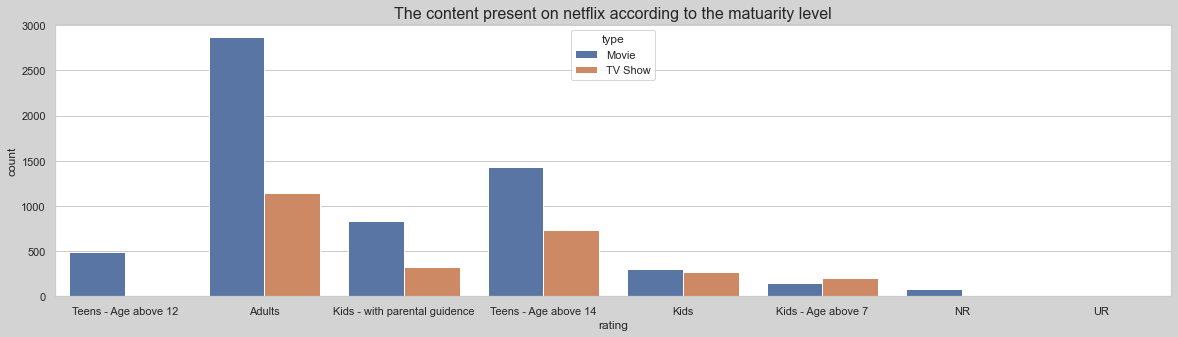

In [67]:
fig = plt.figure(figsize = (20,5))
sns.set(style = "whitegrid")
fig.set_facecolor("lightgrey")
sns.countplot(data = df , hue = "type" , x = "rating")
plt.title("The content present on netflix according to the matuarity level" , fontsize = 16)
plt.show()

# 9.  Top 20 Actors who have contributed to the Netflix content

In [68]:
cast = df.groupby(["type" , "cast"])["cast"].count().unstack("type")
cast.columns = ["Movie" , "TV Show"]
netflix_cast = cast[cast["Movie"].notnull()].iloc[:,:1]
netflix_cast.reset_index(level = "cast" , inplace = True)
life = netflix_cast.head(20)


In [69]:
life

,cast,Movie
0,"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I...",1.0
1,"50 Cent, Ryan Phillippe, Bruce Willis, Rory Ma...",1.0
2,"A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasc...",1.0
3,A.R. Rahman,1.0
4,"Aadhi, Tapsee Pannu, Ritika Singh, Vennela Kis...",1.0
5,"Aadil Khan, Sadia Khateeb, Zain Khan Durrani, ...",1.0
6,"Aamina Sheikh, Sanam Saeed, Adnan Malik, Moham...",1.0
7,"Aamir Khan, Anuskha Sharma, Sanjay Dutt, Saura...",1.0
8,"Aamir Khan, Ashutosh Gowariker",1.0
9,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...",1.0


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


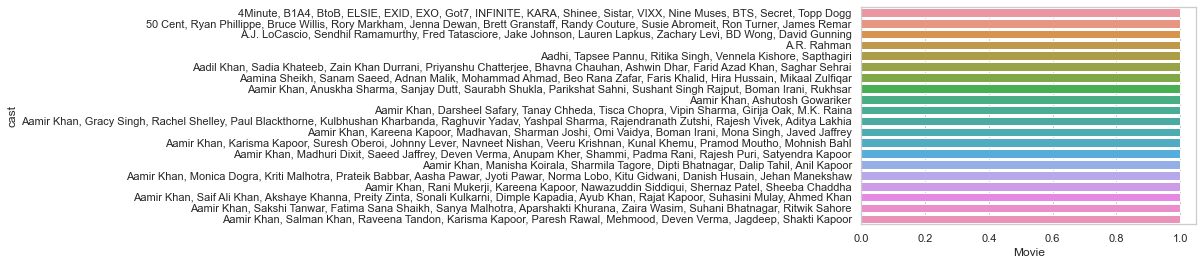

In [70]:
sns.barplot(life["Movie"] , life["cast"])
plt.show()

# 10 . Year wise count for Movies and Tv Shows

In [71]:
year_count = df.groupby(["year_added" , "type"]).size().reset_index()
year_count.rename({0:"count"} , axis = 1 , inplace = True)
year_count

,year_added,type,count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,5
8,2014.0,Movie,19
9,2014.0,TV Show,5


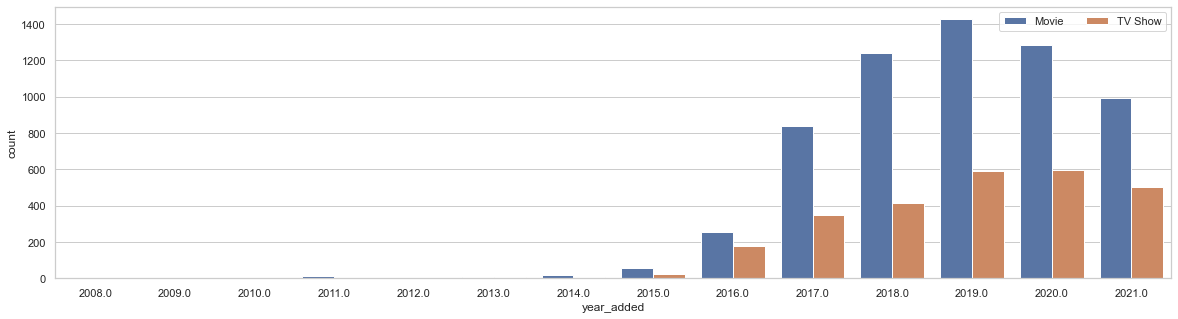

In [72]:
plt.figure(figsize = (20,5))
sns.barplot(data = year_count , x = "year_added" , y = "count" , hue = "type")
plt.legend(ncol = 2)
plt.show()


It is seen that from 2014 till 2021 the trend of movies and Tv shows have been increased. There are lot of movies and Tv shows are added into the netflix platform. However, the trend of graph is decreasing after 2019. The recommendation ncrease the number of movies will eventually increase the users.

# Recommendations

1 . In the first place the movies are more popular than Tv shows it means that more the number of movies more will be the revenue.

2 .  We saw the trend of rating of movies and Tv shows with respect to ratings and it showed that adults watch more number of movies and Tv shows than other age group. It means netflix should upload more content which adults have more interests to increase the rate of ratings.

3 . After that, we saw the different content available in the different countries with respect to movies and Tv shows. The recommendation for this movie is more likeable in most of the countries. In order to increase the buisness then netflix should add more movies into the platform.

4 . We plotted displot to see the relationship between the count and duration of the movies and the trend is showing higher between 100 - 120 minutes.The recommendation is that netflix upload the movies which has the time duration between 100 -120 minutes. 

5 . It is seen that from 2014 till 2021 the trend of movies and Tv shows have been increased. There are lot of movies and Tv shows are added into the netflix platform. However, the trend of graph is decreasing after 2019. The recommendation is to increase the number of movies will eventually increase the users.